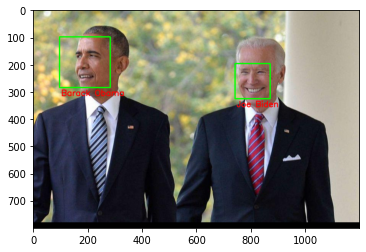

In [13]:
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import cv2
import numpy as np

obama_image = face_recognition.load_image_file("test_images/obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

biden_image = face_recognition.load_image_file("test_images/biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding]

known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

unknown_image = face_recognition.load_image_file("test_images/two_people1.jpg")

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

        
    image = cv2.rectangle(unknown_image,(left,top),(right,bottom),(0,255,0),3)
    
    font = cv2.FONT_HERSHEY_SIMPLEX 
    fontScale = 1

    color = (255, 0, 0) 

    thickness = 2

    image = cv2.putText(unknown_image, name, (left + 6, bottom  + 30), font,  
                       fontScale, color, thickness, cv2.LINE_AA) 
    
plt.imshow(image)
plt.show()